In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Yaser\Documents\LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data["Loan_ID"].nunique()

614

In [6]:
data.drop(columns=["Loan_ID"],inplace=True)

In [7]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
data["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
data["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [16]:
data["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [17]:
data["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [18]:
data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
data["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [20]:
data["Credit_History"].unique()

array([ 1.,  0., nan])

In [21]:
data["Credit_History"]=data["Credit_History"].replace({1:"good",0:"bad"})

In [22]:
data["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [23]:
data["Credit_History"].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [24]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
data["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [26]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [27]:
data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [28]:
continous=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
discrete_categorical=["Gender","Married","Education","Self_Employed",
                      "Credit_History","Property_Area","Loan_Status"]
discrete_count=["Dependents","Loan_Amount_Term"]

In [29]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [30]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


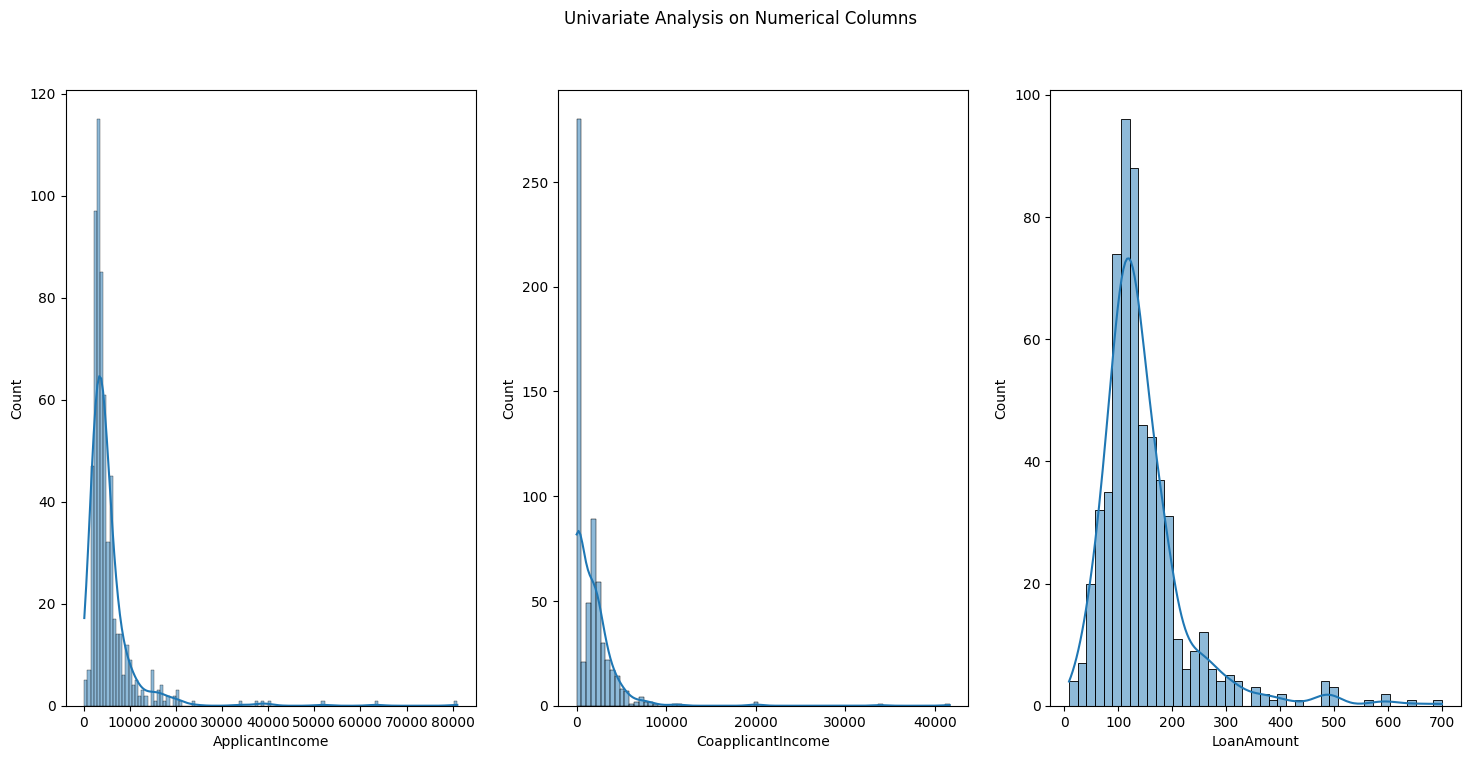

In [31]:
plt.rcParams["figure.figsize"]=(18,8)

plt.subplot(1,3,1)
sns.histplot(data["ApplicantIncome"],kde=True)

plt.subplot(1,3,2)
sns.histplot(data["CoapplicantIncome"],kde=True)

plt.subplot(1,3,3)
sns.histplot(data["LoanAmount"],kde=True)

plt.suptitle("Univariate Analysis on Numerical Columns")
plt.show()

In [32]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

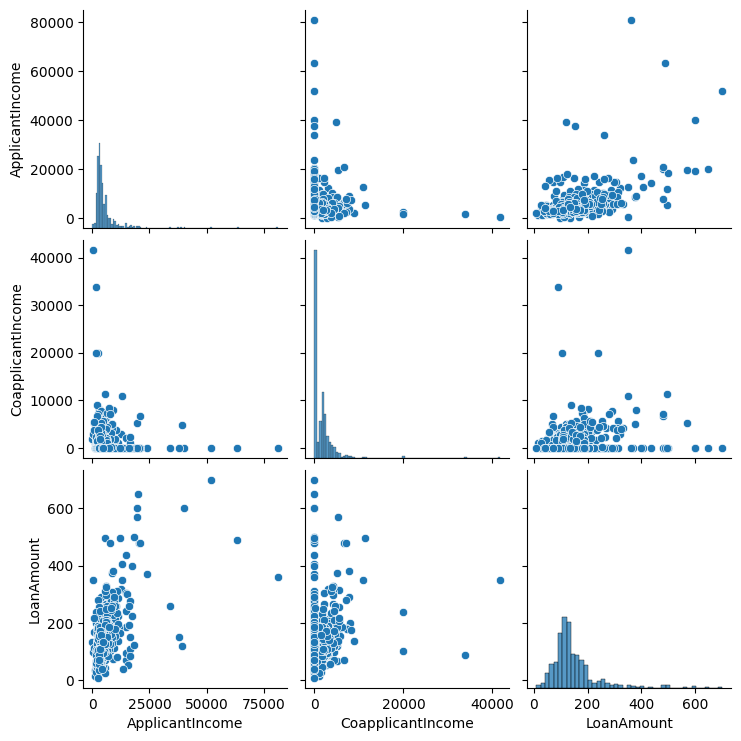

In [33]:
sns.pairplot(data[continous])
plt.show()

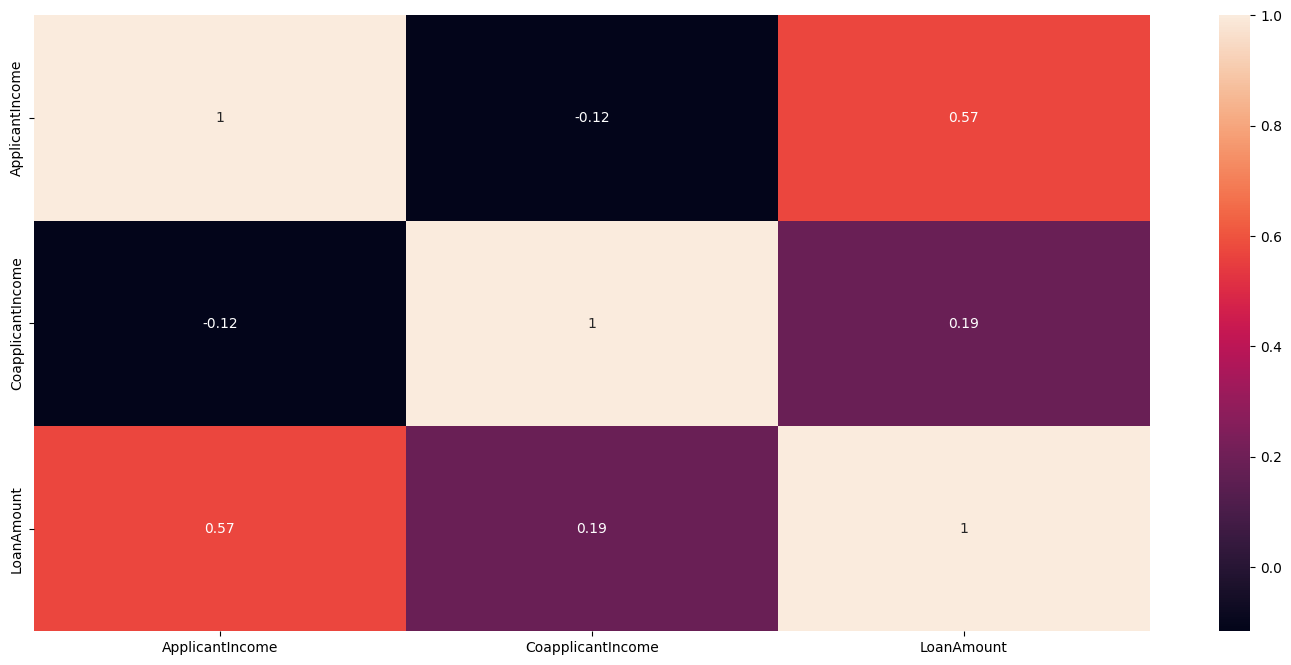

In [34]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

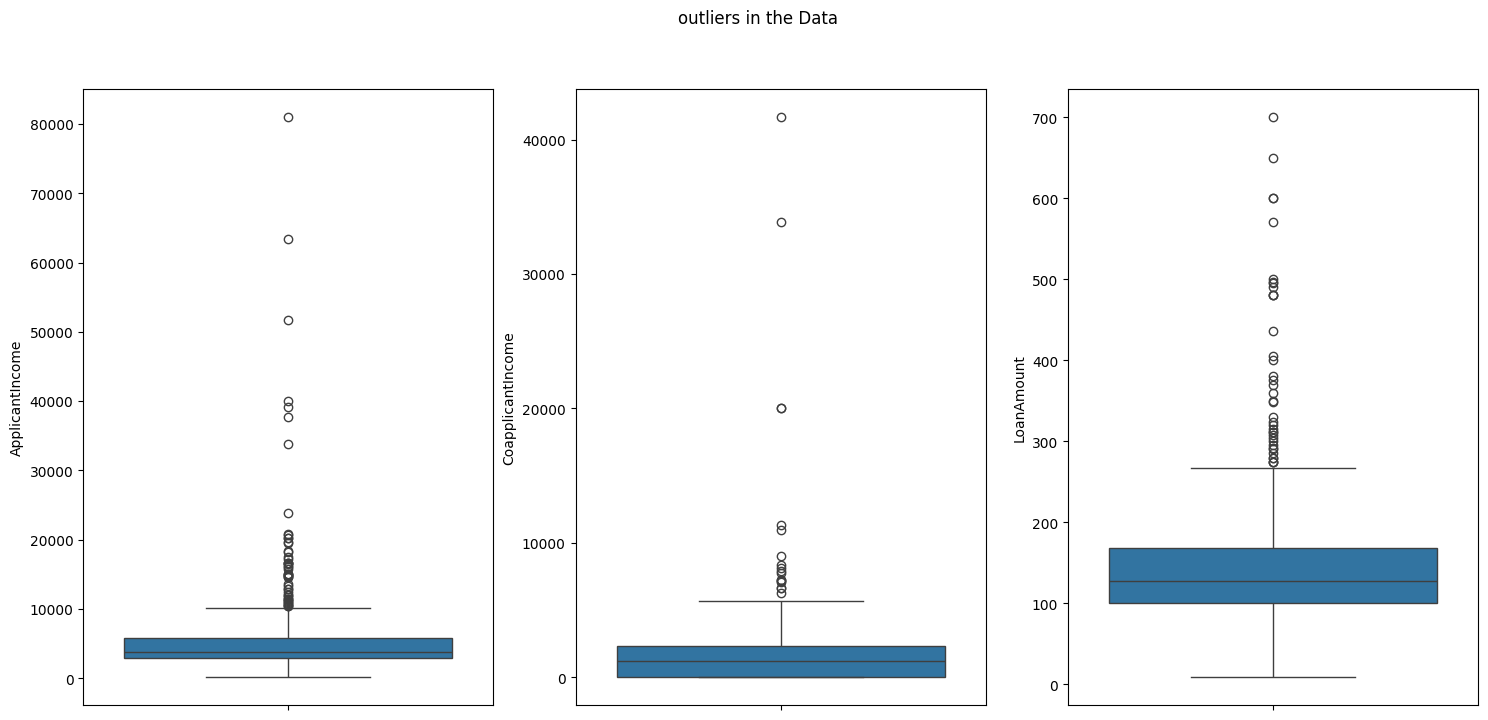

In [35]:
plt.subplot(1,3,1)
sns.boxplot(data["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(data["CoapplicantIncome"])

plt.subplot(1,3,3)
sns.boxplot(data["LoanAmount"])

plt.suptitle("outliers in the Data")
plt.show()

In [36]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


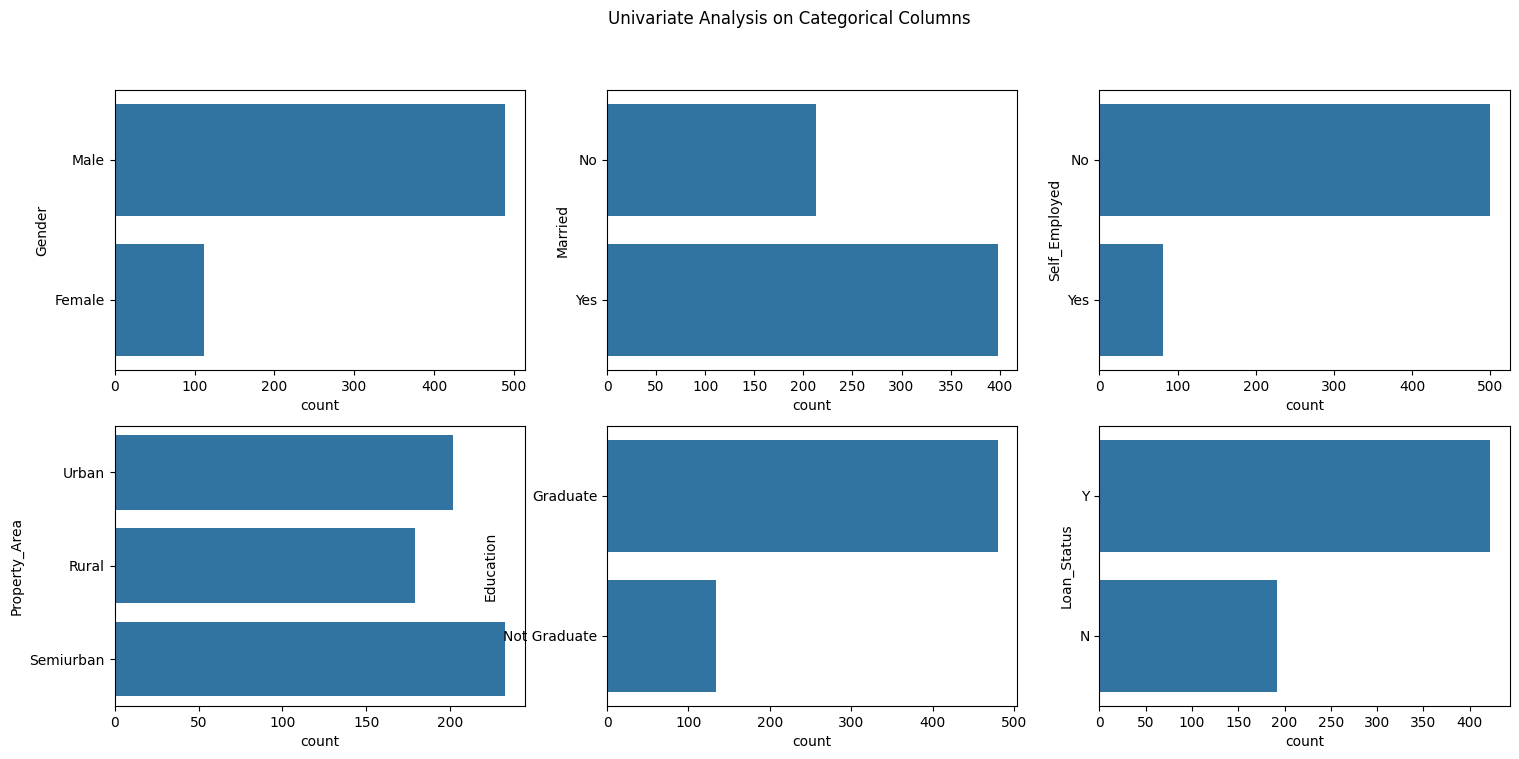

In [37]:
plt.rcParams["figure.figsize"]=(18,8)

plt.subplot(2,3,1)
sns.countplot(data["Gender"])

plt.subplot(2,3,2)
sns.countplot(data["Married"])

plt.subplot(2,3,3)
sns.countplot(data["Self_Employed"])

plt.subplot(2,3,4)
sns.countplot(data["Property_Area"])

plt.subplot(2,3,5)
sns.countplot(data["Education"])

plt.subplot(2,3,6)
sns.countplot(data["Loan_Status"])

plt.suptitle("Univariate Analysis on Categorical Columns")
plt.show()




In [38]:
data["Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [39]:
data["Dependents"]=data["Dependents"]=data["Dependents"].replace({"3+":3})

In [40]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [41]:
data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [42]:
data=data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])

data["Dependents"]=data["Dependents"].fillna(0)
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [43]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [44]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,good,Urban,Y,9613.0


In [45]:
data["Gender"]=data["Gender"].replace({"Male":1,"Female":0})
data["Married"]=data["Married"].replace({"Yes":1,"No":0})
data["Education"]=data["Education"].replace({"Graduate":1,"Not Graduate":0})
data["Self_Employed"]=data["Self_Employed"].replace({"Yes":1,"No":0})
data["Property_Area"]=data["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
data["Credit_History"]=data["Credit_History"].replace({"good":1,"bad":0})
data["Loan_Status"]=data["Loan_Status"].replace({"Y":1,"N":0})
data["Loan_Amount_Term"]=data["Loan_Amount_Term"]/12

In [46]:
data["Dependents"]=data["Dependents"].astype("int")
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].astype("int")

In [47]:
data[["Income","LoanAmount"]].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [48]:
from scipy.stats import boxcox
data["Income"],a=boxcox(data["Income"])
data["LoanAmount"],c=boxcox(data["LoanAmount"])

In [49]:
data[["Income","LoanAmount"]].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [50]:
data["Loan_Amount_Term"]=data["Loan_Amount_Term"]/12

In [51]:
X=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [52]:
Train=[]
Test=[]
CV=[]
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LogisticRegression
    log_default=LogisticRegression()
    log_default.fit(X_train,y_train)

    ypred_train=log_default.predict(X_train)
    ypred_test=log_default.predict(X_test)

    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default,X_train,y_train,cv=5,scoring="accuracy").mean())

em=pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm=em[(abs(em["Train"]-em["Test"])<=0.05) & (abs(em["Test"]-em["CV"])<=0.05)]
rs=gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("Best random_state number:",rs)

Best random_state number: 70


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rs)

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
ypred_train=log_reg.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(log_reg,X_train,y_train,cv=5,scoring="accuracy").mean())

ypred_test=log_reg.predict(X_test)
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test accuracy: 0.7830188679245284


In [84]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
knn_grid.fit(X_train,y_train)

knn_model=knn_grid.best_estimator_

from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,y_pred_train))
print("test accuracy:",accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())

train accuracy: 0.8226950354609929
test accuracy: 0.7830188679245284
Cross Validation Score: 0.7494117647058823


In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator=SVC()
param_grid={'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

svm_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)

svm_model=svm_grid.best_estimator_

y_pred_train=svm_model.predict(X_train)
y_pred_test=svm_model.predict(X_test)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.8226950354609929
Cross validation score: 0.8227731092436976
Test accuracy: 0.7830188679245284


In [65]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=rs)
param_grid={"criterion":["gini","entropy"],
            "max_depth":list(range(1,16))}
from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)

dt=dt_grid.best_estimator_

dt_fi=dt.feature_importances_

index=[i for i,x in enumerate(dt_fi) if x>0]

X_train_dt=X_train.iloc[:,index]
X_test_dt=X_test.iloc[:,index]

dt.fit(X_train_dt,y_train)

ypred_train=dt.predict(X_train_dt)
ypred_test=dt.predict(X_test_dt)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
Cross validation score: 0.8227731092436976
Test accuracy: 0.7830188679245284


In [66]:
X_train_dt

,Credit_History
158,1
119,1
448,0
519,1
391,1
...,...
70,1
370,1
140,1
252,1


In [76]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=rs)
param_grid={"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_
rf_fi=rf.feature_importances_

index=[i for i,x in enumerate(rf_fi) if x>0]

X_train_rf=X_train.iloc[:,index]
X_test_rf=X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train=rf.predict(X_train_rf)
ypred_test=rf.predict(X_test_rf)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))
            

Train Accuracy: 0.9905437352245863
Cross validation score: 0.8063025210084034
Test accuracy: 0.7641509433962265


In [77]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=rs)
param_grid={"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab=ab_grid.best_estimator_
ab_fi=ab.feature_importances_

index=[i for i,x in enumerate(ab_fi) if x>0]

X_train_ab=X_train.iloc[:,index]
X_test_ab=X_test.iloc[:,index]

ab.fit(X_train_ab,y_train)

ypred_train=ab.predict(X_train_ab)
ypred_test=ab.predict(X_test_ab)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.83451536643026
Cross validation score: 0.8298879551820729
Test accuracy: 0.7641509433962265


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
estimator= GradientBoostingClassifier(random_state=rs)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}

from sklearn.model_selection import GridSearchCV
gb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb=gb_grid.best_estimator_
gb_fi=gb.feature_importances_

index=[i for i,x in enumerate(gb_fi) if x>0]

X_train_gb=X_train.iloc[:,index]
X_test_gb=X_test.iloc[:,index]

gb.fit(X_train_gb,y_train)

ypred_train=gb.predict(X_train_gb)
ypred_test=gb.predict(X_test_gb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))
            

Train Accuracy: 0.8392434988179669
Cross validation score: 0.82515406162465
Test accuracy: 0.7735849056603774


In [83]:
from xgboost import XGBClassifier
estimator= XGBClassifier(random_state=rs)
param_grid={"n_estimators":[10,20,40,100],"max_depth":[3,4,5],"gamma":[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb=xgb_grid.best_estimator_
xgb_fi=xgb.feature_importances_

index=[i for i,x in enumerate(xgb_fi) if x>0]

X_train_xgb=X_train.iloc[:,index]
X_test_xgb=X_test.iloc[:,index]

xgb.fit(X_train_xgb,y_train)

ypred_train=xgb.predict(X_train_xgb)
ypred_test=xgb.predict(X_test_xgb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))
            

Train Accuracy: 0.8557919621749409
Cross validation score: 0.8275070028011206
Test accuracy: 0.7735849056603774
